# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan

- Nama: Haldies Gerhardien Pasya
- Email: haldiespasya@gmail.com
- Id Dicoding: haldies

## Persiapan

In [ ]:
!pip install xgboost


### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib

### Menyiapkan data yang akan diguankan

## Data Understanding

In [ ]:
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv'
df_employee = pd.read_csv(url)
df_employee

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


In [ ]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

- Terdapat Missing value pada kolom Attrition
- Terdapat 35 kolom data yang terdiri dari :</br>
a. 26 kolom data integer</br>
b. 1 kolom data float</br>
c. 8 kolom data objek



In [ ]:
df_employee.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:

df_employee.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [ ]:
df_employee_clean = df_employee.dropna()
df_employee_clean.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [ ]:
# Mengubah Kolom Attrition menjadi Integer
df_employee_clean.loc[:, 'Attrition'] = df_employee_clean['Attrition'].astype('int64')

In [ ]:
print("Jumlah duplikasi: ", df_employee_clean.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
nums = df_employee_clean.select_dtypes(include='number').columns.tolist()

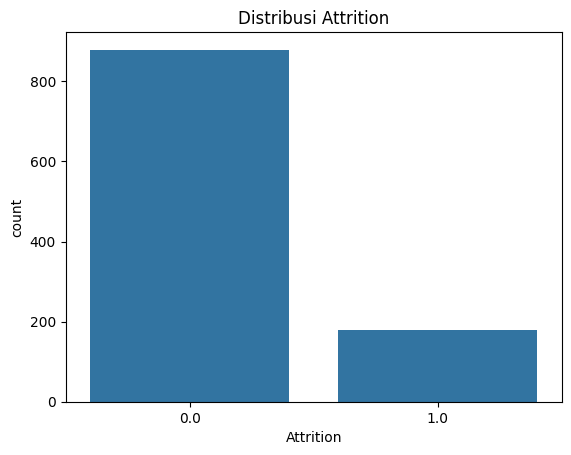

In [ ]:
# EDA Jumlah Attrition
sns.countplot(x='Attrition', data=df_employee_clean)
plt.title("Distribusi Attrition")
plt.show()

Berdasarkan visualisasi di atas dapat kita lihat bahwa karyawan yang attrition ada sekitar 200 orang dan yang tidak attrition ada lebih dari 800 orang

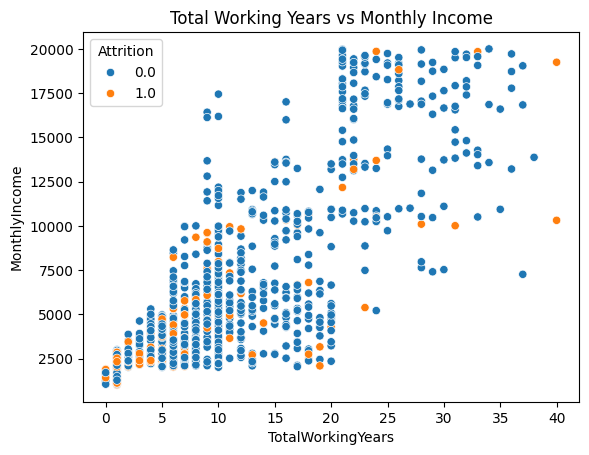

In [ ]:
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', hue='Attrition', data=df_employee_clean)
plt.title("Total Working Years vs Monthly Income")
plt.show()

Berdasarkan visualisasi di atas dapat kita ketahui bahwa semakin lama waktu kerja semakin maka semakin besar monthly income-nya dan semakin lama dan besar monthly income-nya maka semakin sedikit yang melakukan attrition

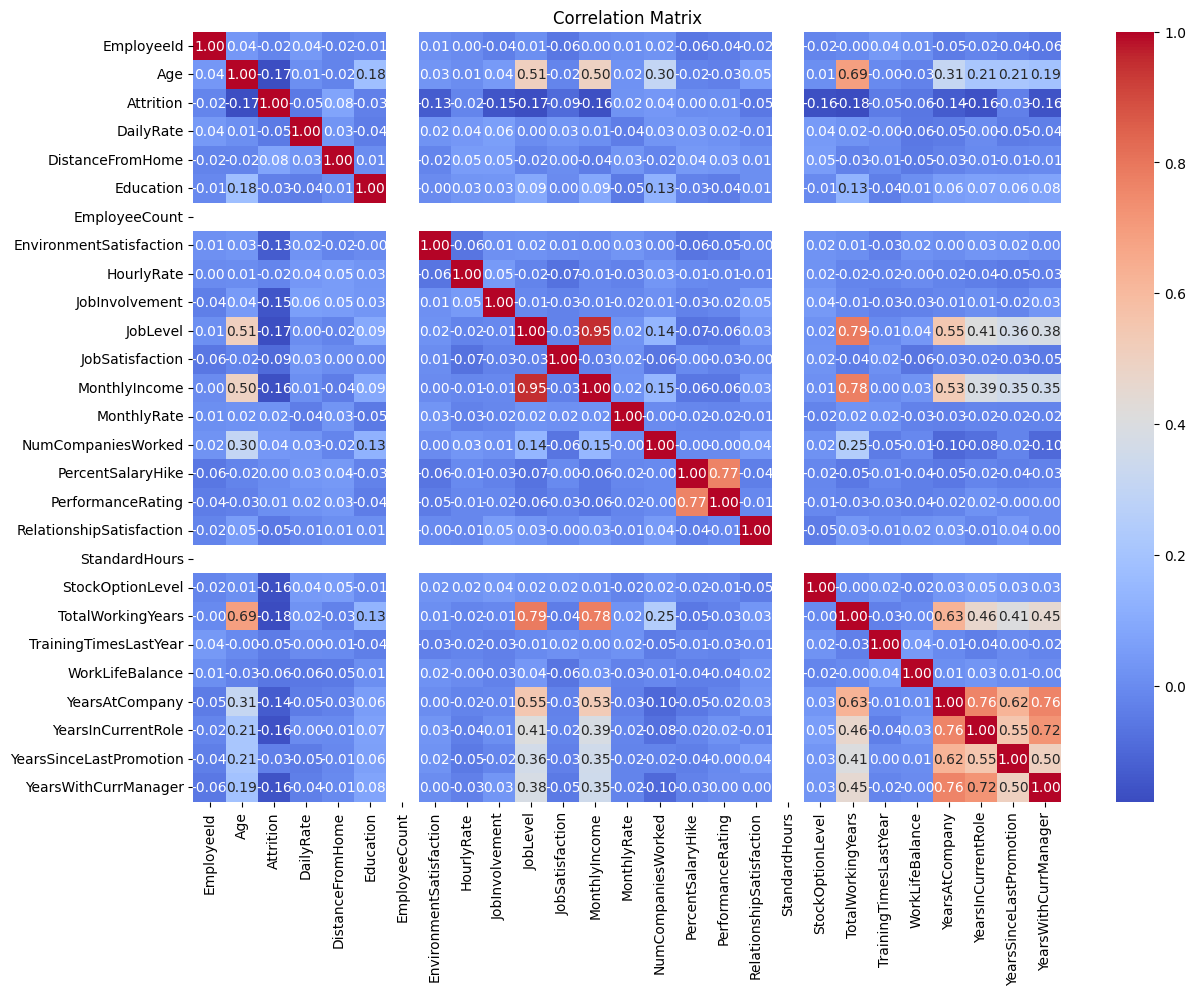

                          EmployeeId       Age  Attrition  DailyRate  \
EmployeeId                  1.000000  0.037388  -0.017912   0.039408   
Age                         0.037388  1.000000  -0.172067   0.010507   
Attrition                  -0.017912 -0.172067   1.000000  -0.051992   
DailyRate                   0.039408  0.010507  -0.051992   1.000000   
DistanceFromHome           -0.024201 -0.022753   0.078074   0.027120   
Education                  -0.007259  0.180723  -0.032631  -0.039805   
EmployeeCount                    NaN       NaN        NaN        NaN   
EnvironmentSatisfaction     0.014436  0.029247  -0.132848   0.023005   
HourlyRate                  0.000607  0.005901  -0.017524   0.038572   
JobInvolvement             -0.037021  0.044010  -0.150196   0.058871   
JobLevel                    0.009278  0.506484  -0.169201   0.003042   
JobSatisfaction            -0.059059 -0.020598  -0.091751   0.026694   
MonthlyIncome               0.001891  0.497392  -0.163600   0.00

In [ ]:
# Korelasi Pearson antar kolom numerik
plt.figure(figsize=(14, 10))
sns.heatmap(df_employee_clean.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
# # Hitung korelasi Pearson antar kolom numerik
# correlation_matrix = df_employee_clean.corr(numeric_only=True)

# # Print korelasi
# print(correlation_matrix)


## Data Preparation / Preprocessing

In [ ]:
cols_to_drop = [
    "EmployeeId",          # ID unik
    "EmployeeCount",       # konstan
    "StandardHours",       # konstan
    "DailyRate",           # korelasi rendah
    "Education",           # korelasi rendah
    "HourlyRate",          # korelasi rendah
    "MonthlyRate",         # korelasi rendah
    "NumCompaniesWorked",  # korelasi rendah
    "PercentSalaryHike",   # korelasi rendah
    "PerformanceRating",   # korelasi rendah
    "RelationshipSatisfaction",  # korelasi rendah
    "TrainingTimesLastYear",      # korelasi rendah
    "WorkLifeBalance",     # korelasi rendah
    "YearsSinceLastPromotion",  # korelasi rendah
    "Over18"
]
employee_drop = df_employee_clean.drop(columns=cols_to_drop)


In [ ]:
employee_drop.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
employee_drop.to_csv('employee_clean.csv', index=False)

In [ ]:
employee_new = employee_drop

In [ ]:
employee_new['BusinessTravel'] = employee_new['BusinessTravel'].map({'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2})
employee_new['Department'] = employee_new['Department'].map({'Human Resources': 0, 'Research & Development': 1, 'Sales': 2})
employee_new['EducationField'] = employee_new['EducationField'].map({'Other': 0, 'Human Resources': 1, 'Life Sciences': 2, 'Marketing': 3, 'Medical': 4, 'Technical Degree': 5})
employee_new['Gender'] = employee_new['Gender'].map({'Male': 0, 'Female': 1})
employee_new['JobRole'] = employee_new['JobRole'].map({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Research Director': 6, 'Sales Representative': 7, 'Human Resources': 8})
employee_new['MaritalStatus'] = employee_new['MaritalStatus'].map({'Married': 0, 'Single': 1, 'Divorced': 2})
employee_new['OverTime'] = employee_new['OverTime'].map({'Yes': 1, 'No': 0})



In [ ]:
X = employee_new.drop(["Attrition"], axis =1)
y = employee_new["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1058
Total # of sample in train dataset: 846
Total # of sample in test dataset: 212


## Modeling

In [ ]:
knn = KNeighborsClassifier().fit(X_train, y_train)
rf = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=24).fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:01:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Evaluation

In [ ]:
from sklearn.metrics import classification_report

for model_name, model in [('KNN', knn), ('RF', rf), ('XGB', xgb_model)]:
    y_pred = model.predict(X_test)
    print(f"=== {model_name} ===")
    print(classification_report(y_test, y_pred, zero_division=0))


=== KNN ===
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89       174
         1.0       0.17      0.03      0.05        38

    accuracy                           0.80       212
   macro avg       0.49      0.50      0.47       212
weighted avg       0.70      0.80      0.74       212

=== RF ===
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       174
         1.0       0.60      0.24      0.34        38

    accuracy                           0.83       212
   macro avg       0.73      0.60      0.62       212
weighted avg       0.81      0.83      0.80       212

=== XGB ===
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       174
         1.0       0.61      0.45      0.52        38

    accuracy                           0.85       212
   macro avg       0.75      0.69      0.71       212
weighted avg       0.84      0.85      

In [ ]:
import pandas as pd

booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='gain')
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head(5))
         Feature  Importance
13          OverTime    2.479734
8           JobLevel    2.344183
14  StockOptionLevel    1.304632
7     JobInvolvement    1.076626
16    YearsAtCompany    0.865807


             Feature  Importance
13          OverTime    2.479734
8           JobLevel    2.344183
14  StockOptionLevel    1.304632
7     JobInvolvement    1.076626
16    YearsAtCompany    0.865807
